# Supervised Learning

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## load data

In [2]:
data = pd.read_csv('wdbc.data.csv', header = None).drop(0,1)

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data[1] = data[1].map({'M': 1, 'B': 0})

In [5]:
test_M = data[data[1]==1].head(42)

In [6]:
train_M = data[data[1]==1].tail(170)

In [7]:
test_B = data[data[1]==0].head(71)

In [8]:
train_B = data[data[1]==0].tail(286)

In [9]:
test_data = pd.concat([test_M,test_B])

In [10]:
train_data = pd.concat([train_M,train_B])

In [11]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
47,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790
53,1,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
54,1,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
56,1,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
57,1,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,...,17.87,30.70,115.7,985.5,0.1368,0.4290,0.3587,0.1834,0.3698,0.10940


In [12]:
train_x = train_data.iloc[:,2:]

In [13]:
train_x_normal = preprocessing.normalize(train_x)

In [14]:
train_y = train_data[1]

In [15]:
def getweight(rang,train_x, train_y):
    all_score=[]
    for i in rang:
        clf = LinearSVC(penalty='l1', dual=False, C=i,max_iter=1000000)
        all_score.append(cross_val_score(estimator=clf, X=train_x, y=np.ravel(train_y), cv=5).mean())
    print('best_:weight',rang[all_score.index(max(all_score))])
    print('accuracy_score:',max(all_score)) 

In [16]:
clf = LinearSVC(penalty='l1', dual=False, C=10,max_iter=100000)
cross_val_score(estimator=clf, X=train_x_normal, y=np.ravel(train_y), cv=5)

array([0.93478261, 0.93406593, 0.95604396, 0.89010989, 0.95604396])

In [17]:
getweight([1,3,5,7,9,10], train_x_normal, train_y)

best_:weight 10
accuracy_score: 0.9342092689918777


In [18]:
clf =  LinearSVC(penalty ='l1', C= 10, dual=False,max_iter = 100000)
clf.fit(train_x_normal,train_y)

LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

### results for testing data

In [19]:
test_x = test_data.iloc[:,2:]
test_x_normal = preprocessing.normalize(test_x)

In [20]:
test_y = test_data[1]

In [21]:
pred_y = clf.predict(test_x_normal)

In [22]:
pred_y = pd.DataFrame(pred_y)

In [23]:
confusion_matrix(test_y, pred_y)

array([[70,  1],
       [ 9, 33]])

In [24]:
#probs = clf.predict_proba(test_x)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)

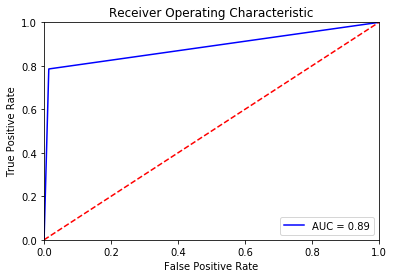

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
# get scores 
def run_svm(test_x,test_y):
    results = dict()
    clf =  LinearSVC(penalty ='l1', C= 10, dual=False,max_iter = 100000)
    clf.fit(train_x_normal,train_y)
    pred_y = clf.predict(test_x)
    pred_y = pd.DataFrame(pred_y)
    results['accuracy'] = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y, average='binary')
    results['precision'] = precision
    recall = recall_score(test_y, pred_y, average='binary')
    results['recall'] = recall
    f1 = f1_score(test_y, pred_y, average='binary')  
    results['f1_score'] = f1
    fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    results['AUC'] = auc
    
    return results
    

In [27]:
result = run_svm(test_x_normal,test_y)

In [28]:
result

{'accuracy': 0.911504424778761,
 'precision': 0.9705882352941176,
 'recall': 0.7857142857142857,
 'f1_score': 0.8684210526315789,
 'AUC': 0.885814889336016}

In [29]:
accuracy = 0
precision = 0
recall = 0
f_1 = 0
AUC = 0
i = 1
for i in range(1,31,1):
    clf =  LinearSVC(penalty ='l1', C= 10, dual=False,max_iter = 100000)
    clf.fit(train_x_normal,train_y)
    result = run_svm(test_x,test_y)
    accuracy = accuracy + result['accuracy']
    precision = precision +result['precision']
    recall = recall + result['recall']
    f_1 = f_1 + result['f1_score']
    AUC = AUC + result['AUC']
    i = i+1
print('accuracy for testing data', accuracy/30)
print('precision for testing data', precision/30)
print('recall for testing data', recall/30)
print('f1_score for testing data ', f_1/30)
print('AUC for testing data', AUC/30)

accuracy for testing data 0.9115044247787615
precision for testing data 0.970588235294117
recall for testing data 0.7857142857142857
f1_score for testing data  0.8684210526315789
AUC for testing data 0.8858148893360156


### for training data

In [30]:
train_pred_y = clf.predict(train_x_normal)

In [31]:
train_pred_y = pd.DataFrame(train_pred_y)

In [32]:
confusion_matrix(train_y, train_pred_y)

array([[277,   9],
       [ 20, 150]])

In [33]:
fpr, tpr, threshold = metrics.roc_curve(train_y, train_pred_y)
roc_auc = metrics.auc(fpr, tpr)

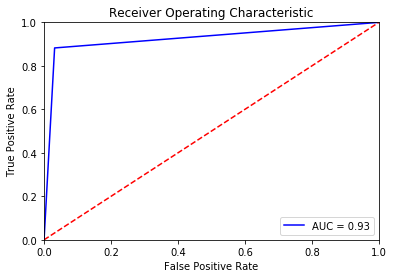

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
result = run_svm(train_x_normal,train_y)

In [36]:
result

{'accuracy': 0.9364035087719298,
 'precision': 0.9433962264150944,
 'recall': 0.8823529411764706,
 'f1_score': 0.911854103343465,
 'AUC': 0.9254422048539696}

In [37]:
accuracy = 0
precision = 0
recall = 0
f_1 = 0
AUC = 0
i = 1
for i in range(1,31,1):
    clf =  LinearSVC(penalty ='l1', C= 10, dual=False,max_iter = 100000)
    clf.fit(train_x_normal,train_y)
    result = run_svm(train_x_normal,train_y)
    accuracy = accuracy + result['accuracy']
    precision = precision +result['precision']
    recall = recall + result['recall']
    f_1 = f_1 + result['f1_score']
    AUC = AUC + result['AUC']
    i = i+1
print('accuracy for training data', accuracy/30)
print('precision for training data', precision/30)
print('recall for training data', recall/30)
print('f1_score for training data ', f_1/30)
print('AUC for training data', AUC/30)

accuracy for training data 0.9363304093567256
precision for training data 0.9431996855345907
recall for training data 0.8823529411764709
f1_score for training data  0.91176199686838
AUC for training data 0.9253839297956941


### ii. Self-training

### split data

In [38]:
test_data = pd.concat([test_M,test_B],ignore_index= True)
test_data.shape

(113, 31)

In [39]:
train_data = pd.concat([train_M,train_B],ignore_index= True)
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790
1,1,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
2,1,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
3,1,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
4,1,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,...,17.87,30.70,115.7,985.5,0.1368,0.4290,0.3587,0.1834,0.3698,0.10940


In [40]:
neg_train_labeled = train_data[train_data[1]==0].sample(frac=0.5)

In [41]:
neg_train_unlabeled = train_data[train_data[1]==0].loc[~train_data[train_data[1]==0].index.isin(neg_train_labeled.index)]

In [42]:
pos_train_labeled = train_data[train_data[1]==1].sample(frac=0.5)

In [43]:
pos_train_unlabeled = train_data[train_data[1]==1].loc[~train_data[train_data[1]==1].index.isin(pos_train_labeled.index)]

In [44]:
# labeled data
labeled = pd.concat([neg_train_labeled,pos_train_labeled],ignore_index= True)
labeled.shape

(228, 31)

In [45]:
# ulabeled data
unlabeled = pd.concat([neg_train_unlabeled,pos_train_unlabeled],ignore_index= True).drop(1,1)

### A

In [46]:
labeled_x = labeled.drop(1,1)

In [47]:
labeled_x_normal = preprocessing.normalize(labeled_x)

In [48]:
labeled_y = labeled[1]

In [49]:
clf_ii = LinearSVC(penalty='l1', dual=False, C=10000,max_iter=100000000)
cross_val_score(estimator=clf_ii, X=labeled_x_normal, y=np.ravel(labeled_y), cv=5)

array([0.97826087, 0.95652174, 0.95652174, 0.93333333, 0.95555556])

In [50]:
getweight([10000,13000,15000,17000,19000,100000], labeled_x_normal, labeled_y)

best_:weight 100000
accuracy_score: 0.9561352657004832


### B

In [51]:
clf_ii = LinearSVC(penalty='l1', dual=False, C=10000,max_iter=10000000)

In [52]:
clf_ii.fit(labeled_x_normal,labeled_y)

LinearSVC(C=10000, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [53]:
# get the model
i = 1
labeled = pd.concat([neg_train_labeled,pos_train_labeled],ignore_index= True)
unlabeled = pd.concat([neg_train_unlabeled,pos_train_unlabeled],ignore_index= True).drop(1,1)
for i in range(1,229,1):
    # train a model
    #labeled = pd.concat([neg_train_labeled,pos_train_labeled],ignore_index= True)
    labeled_x = labeled.drop(1,1)
    labeled_y = labeled[1]
    labeled_x_normal = preprocessing.normalize(labeled_x)
    clf_ii = LinearSVC(penalty='l1', dual=False, C=10000,max_iter=10000000)
    clf_ii.fit(labeled_x_normal,labeled_y)
    # get the distance on unlabeled data
    #unlabeled = pd.concat([neg_train_unlabeled,pos_train_unlabeled],ignore_index= True).drop(1,1)
    unlabeled_normal = preprocessing.normalize(unlabeled)
    result = clf_ii.decision_function(unlabeled_normal)
    result_1 = pd.DataFrame(result)# distance of data point
    result_2 = abs(result_1) # get absolute number 
    maxindex = result_2[0].idxmax()# get max distance's index 
    target_row = unlabeled.loc[[result_2[0].idxmax()]]
    # get lable for that point
    new_label = int(clf_ii.predict(target_row))
    # give that label to that point
    stepresult = pd.concat([neg_train_unlabeled,pos_train_unlabeled],ignore_index= True)
    stepresultrow = stepresult.loc[[result_2[0].idxmax()]]
    stepresultrow[[1]]=int(clf_ii.predict(target_row))# that point is ok
    labeled = pd.concat([labeled,stepresultrow])# new trainging data
    unlabeled = unlabeled.drop(maxindex)# left needed label data point
    unlabeled.index = np.arange(0, len(unlabeled))
    i =i +1 


/Users/wangyuying/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [54]:
train_x = train_data.drop(1,1)
train_y = train_data[[1]]
train_x_normal = preprocessing.normalize(train_x)
test_x = test_data.drop(1,1)
test_y = test_data[[1]]
test_x_normal = preprocessing.normalize(test_x)

In [55]:
# for training data
pre_train_y = clf_ii.predict(train_x_normal)
pre_train_y = pd.DataFrame(pre_train_y)

In [56]:
confusion_matrix(train_y, pre_train_y)

array([[285,   1],
       [ 18, 152]])

In [57]:
fpr, tpr, threshold = metrics.roc_curve(train_y, pre_train_y)
roc_auc = metrics.auc(fpr, tpr)

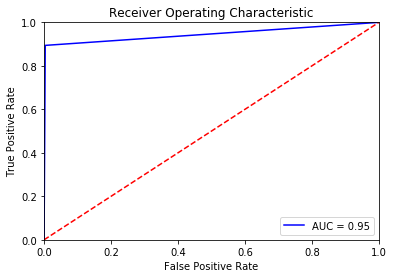

In [58]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
accuracy = 0
precision = 0
recall = 0
f_1 = 0
AUC =0
i = 0
for i in range(1,31,1):
    pred_y = clf_ii.predict(train_x)
    pred_y = pd.DataFrame(pred_y)
    accuracy = accuracy + accuracy_score(train_y, pred_y)
    precision = precision + precision_score(train_y, pred_y, average='binary')
    recall = recall + recall_score(train_y, pred_y, average='binary')
    f_1 = f_1+ f1_score(train_y, pred_y, average='binary') 
    fpr, tpr, thresholds = metrics.roc_curve(train_y, pred_y, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    AUC = AUC + auc
    
print('accuracy for training data', accuracy/30)
print('precision for training data', precision/30)
print('recall for training data', recall/30)
print('f1_score for training data ', f_1/30)
print('AUC for training data', AUC/30)

accuracy for training data 0.6513157894736846
precision for training data 1.0
recall for training data 0.06470588235294118
f1_score for training data  0.12154696132596679
AUC for training data 0.5323529411764709


In [60]:
# for testing data 
pre_y = clf_ii.predict(test_x_normal)
pre_y = pd.DataFrame(pre_y)

In [61]:
confusion_matrix(test_y, pre_y)

array([[69,  2],
       [ 8, 34]])

In [62]:
fpr, tpr, threshold = metrics.roc_curve(test_y, pre_y)
roc_auc = metrics.auc(fpr, tpr)

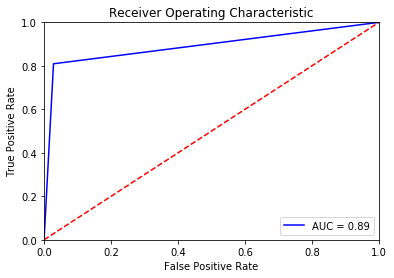

In [63]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
accuracy = 0
precision = 0
recall = 0
f_1 = 0
AUC =0
i = 0
for i in range(1,31,1):
    pred_y = clf_ii.predict(test_x)
    pred_y = pd.DataFrame(pred_y)
    accuracy = accuracy + accuracy_score(test_y, pred_y)
    precision = precision + precision_score(test_y, pred_y, average='binary')
    recall = recall + recall_score(test_y, pred_y, average='binary')
    f_1 = f_1+ f1_score(test_y, pred_y, average='binary') 
    fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    AUC = AUC + auc
    
print('accuracy for testing data', accuracy/30)
print('precision for testing data', precision/30)
print('recall for testing data', recall/30)
print('f1_score for testing data ', f_1/30)
print('AUC for testing data', AUC/30)

accuracy for testing data 0.6460176991150443
precision for testing data 1.0
recall for testing data 0.04761904761904765
f1_score for testing data  0.09090909090909086
AUC for testing data 0.5238095238095238
